In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [38]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [39]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Due to confidentiality issues, the original features and background information about the data is not provided.
Features V1, V2, … V28 are the principal components obtained with PCA

In [40]:
df.shape

(284807, 31)

There are 284807 rows and 31 features

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


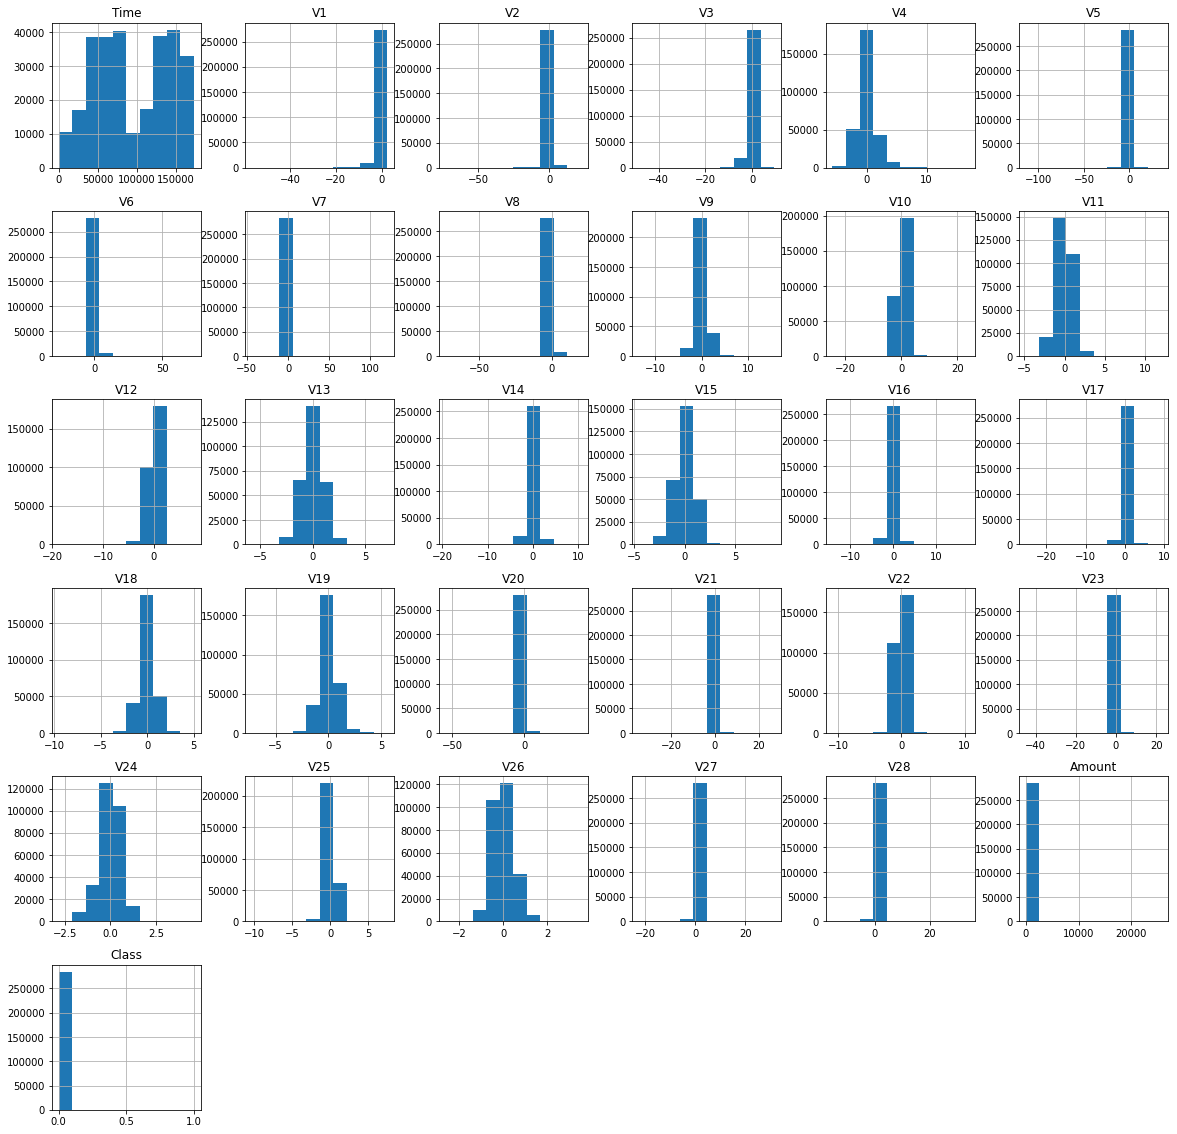

In [43]:
df.hist(figsize = (20, 20))
plt.show()

In [44]:
# analysing the fraud and not_fraud cases separately
print("Valid Transactions:")
df.Time[df.Class==0].describe()


Valid Transactions:


count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [45]:
df.Amount[df.Class==0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [46]:
print("Fraudelent Transactions:")
df.Time[df.Class==1].describe()

Fraudelent Transactions:


count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

We can notice that the number of fraud cases is very few compared to the number of valid transactions which portrays that it is an imbalanced dataset. We also notice that the standard deviation for frauds wrt time is more than that of valid transactions which means frauds are more evenly spread compared to valid ones. We will investigate more on this below with a histogram.

In [47]:
df.Amount[df.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We can also notice that the min for fraudelent transaction amount is 0 and for valid, its 406. While the max amount of frauds is only 2125 whereas for valid its 25691, we can still see that the mean amount for fraudulent transactions 122 is higher than for the valid transactions which is 88. This makes sense since people who commit frauds want to to extract the maximum possible without getting caught and so mean is higher but max is still lower.
We can see in the below graph too that it is clearly a skewed distribution.  

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of fraud and valid transactions')

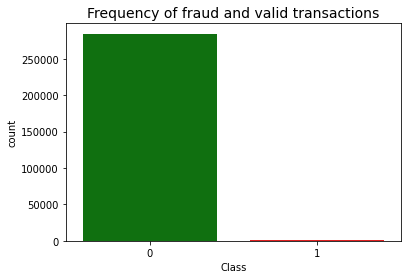

In [48]:
colors = ["green", "red"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Frequency of fraud and valid transactions', fontsize=14)

In [49]:
#OUTLIERS
#FINDING IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#COUNTING OUTLIERS IN THE ENTIRE DATASET
print("Count of outliers in the dataset=",((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sum())

Count of outliers in the dataset= 370864


In [50]:
fraud = df[df['Class'] == 1]
not_fraud = df[df['Class'] == 0]
fraud_perc=(len(fraud)/len(df))*100
fraud_perc

0.1727485630620034

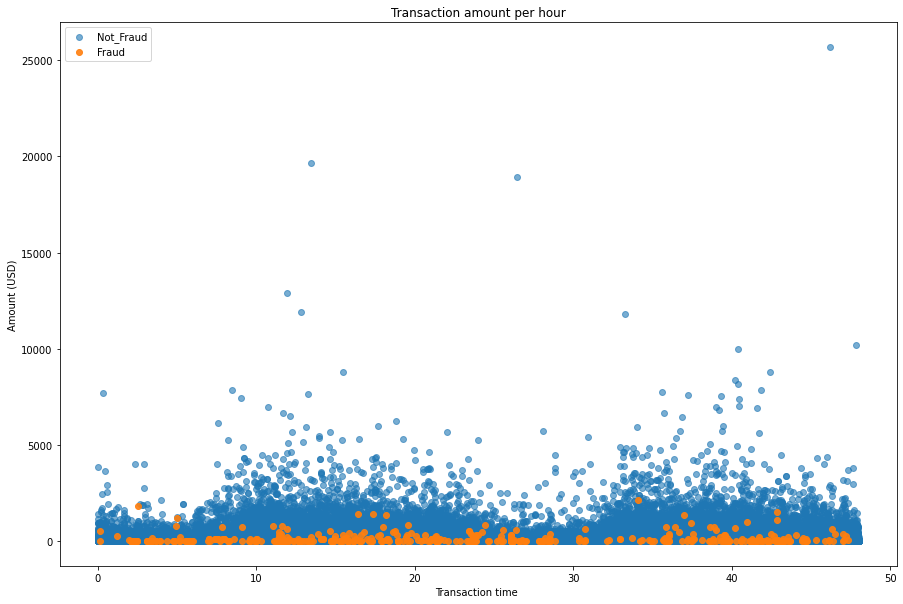

In [51]:
seconds=3600
plt.figure(figsize=(15,10))
plt.scatter((not_fraud.Time/(seconds)), not_fraud.Amount, alpha=0.6, label='Not_Fraud')
plt.scatter((fraud.Time/(seconds)), fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Transaction amount per hour")
plt.xlabel("Transaction time ")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper left')
plt.show()

We can see that most of the frauds have a lower amount than valid transactions

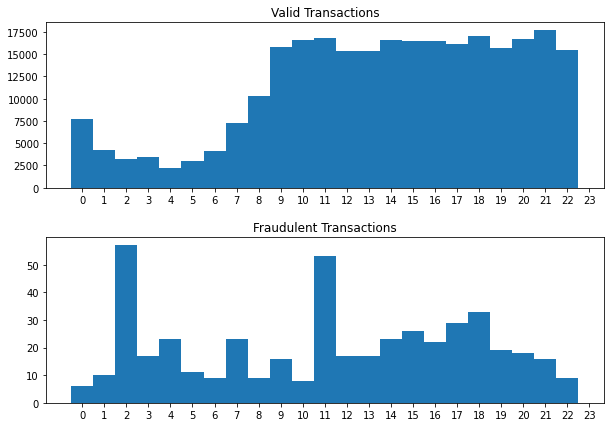

In [53]:

from datetime import datetime
ab=df.copy(deep=True)
ab["hrs"] = ab["Time"].apply(datetime.fromtimestamp).dt.hour
fig, axes = plt.subplots(2, figsize=(10,7))
for a in axes:
    a.set_xticks(range(24))
ab.loc[ab["Class"] == 0]["hrs"].hist(bins=np.arange(24)-0.5, ax=axes[0], grid=False)
ab.loc[ab["Class"] == 1]["hrs"].hist(bins=np.arange(24)-0.5, ax=axes[1], grid=False)
axes[0].title.set_text("Valid Transactions")
axes[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

We can see that as expected,valid transactions rate increases as the day starts and reaches min during the night whereas frauds tend to peak at 2am and around 12 pm but is still more evenly spread which explains its higher standard deviation we saw before

In [54]:
df.corr(method="pearson").head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


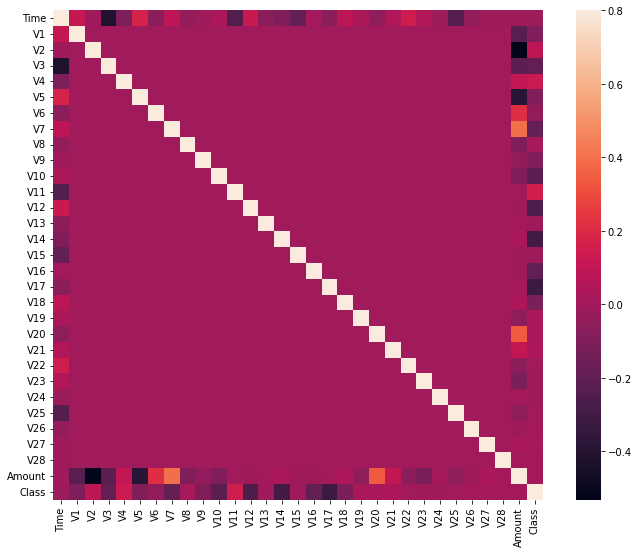

In [55]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Unsupervised Algorithms

Local Outlier Factor

In [56]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
x1= df.drop('Class',axis = 1) 
y1= df['Class'] 
outlier_frac=len(fraud)/float(len(not_fraud))
lof=LocalOutlierFactor(n_neighbors = 20,contamination = outlier_frac)
y_pred1 = lof.fit_predict(x1)
y_pred1[y_pred1 == 1] = 0
y_pred1[y_pred1 == -1] = 1
n_errors = (y_pred1 != y1).sum()
print('LOCAL OUTLIER FACTOR: {}'.format(n_errors))
print('Accuracy:',accuracy_score(y1, y_pred1))
print('Classification report')
print(classification_report(y1, y_pred1))

LOCAL OUTLIER FACTOR: 935
Accuracy: 0.9967170750718908
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



Isolation Forest

In [57]:
from sklearn.ensemble import IsolationForest
ifor=IsolationForest(max_samples=len(x1),contamination=outlier_frac,random_state=1)
ifor.fit(x1)
ifor_scores = ifor.decision_function(x1)
y_pred2 = ifor.predict(x1)
y_pred2[y_pred2 == 1] = 0
y_pred2[y_pred2 == -1] = 1
n_errors = (y_pred2 != y1).sum()
print('ISOLATION FOREST: {}'.format(n_errors))
print('Accuracy:',accuracy_score(y1, y_pred2))
print('Classification report')
print(classification_report(y1, y_pred2))

ISOLATION FOREST: 647
Accuracy: 0.9977282861727416
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



# Supervised Algorithms

Credit Card Fraud Detection using Random **Forest**

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [59]:
df['Amount']=StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df=df.drop(['Time'],axis=1)
print(df.head())
df_non_fraud=df[df['Class']==0]
df_fraud=df[df['Class']==1]
print(df_non_fraud.shape)
print(df_fraud.shape)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [60]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
smote=SMOTE(random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train_ov,y_train_ov=smote.fit_resample(x_train,y_train)
print(x_train_ov.shape)
print(y_train_ov.shape)

(199364, 29)
(199364,)
(85443, 29)
(85443,)
(398016, 29)
(398016,)


In [62]:
print(x_train_ov.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -2.289565 -0.480260  0.818685 -1.706423  0.822102 -1.660326  0.944047   
1 -0.313717 -4.064342 -3.398445  0.704011  0.101662  1.529848  1.551670   
2 -1.809763 -0.567439  2.265186 -0.960318 -1.212537  1.516493 -1.417176   
3  1.192319  0.178575  0.141491  0.459628 -0.049959 -0.112122 -0.163883   
4 -0.963451  0.700311  1.097333 -1.547626  0.669966  0.513533  0.333683   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.541765  1.323156 -0.434426  ... -0.831985 -0.210837  0.914737  0.867888   
1 -0.036774  0.015829 -0.359561  ...  2.142593  0.853186 -0.091941 -0.936215   
2  0.903421  1.961027 -0.724328  ... -0.554004 -0.509915 -0.424978 -0.268621   
3  0.155740 -0.067566 -0.130220  ... -0.149985 -0.240464 -0.739862  0.116799   
4  0.270900  1.381880 -0.659956  ...  0.122458 -0.279519 -0.470181 -0.124037   

        V24       V25       V26       V27       V28    Amount  
0  0

In [63]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train_ov,y_train_ov)
# predictions
y_pred = rfc.predict(x_test)

The model used is Random Forest classifier
The accuracy is  0.9995669627705019
The precision is 0.8613138686131386
The recall is 0.8676470588235294
The F1-Score is 0.8644688644688644
The Matthews correlation coefficient is 0.8642578190349803


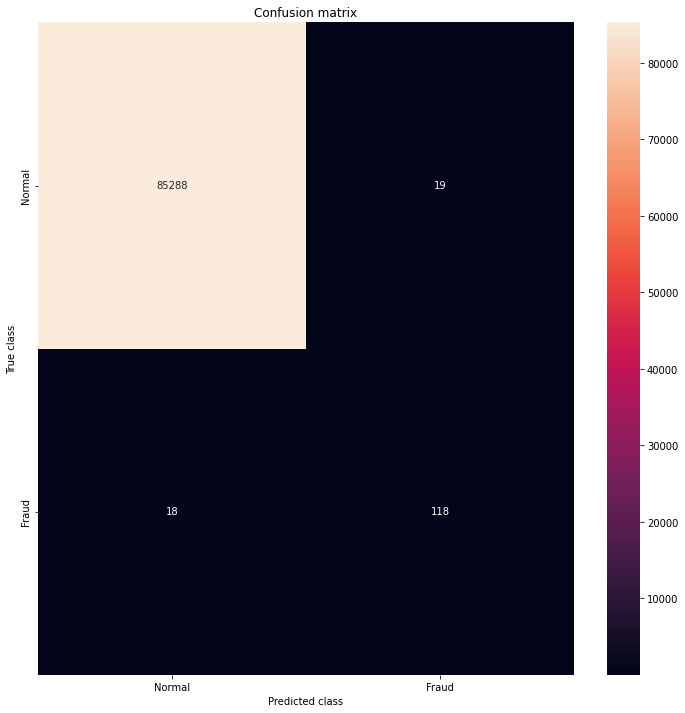

In [64]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
# n_outliers = len(Fraud)
# n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(y_pred,y_test)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))


#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
# plt.figure(figsize=(9, 7))
# print('{}: {}'.format("Random Forest", n_errors))
# print(accuracy_score(Y_test, y_pred))
# print(classification_report(Y_test, y_pred))

Credit Card Fraud Detection using **SVM**

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import itertools

In [66]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [67]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

In [68]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [69]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [70]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [71]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [72]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [73]:
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [74]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [75]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [77]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

In [78]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.

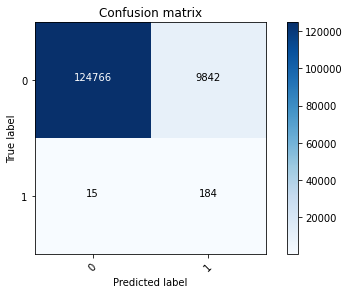

In [79]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [80]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.9268806515982108


In [81]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
print("The model used is SVM")
acc= accuracy_score(prediction_SVM_all,y_test_all)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test_all,prediction_SVM_all)
print("The precision is {}".format(prec))
rec= recall_score(y_test_all,prediction_SVM_all)
print("The recall is {}".format(rec))
f1= f1_score(y_test_all,prediction_SVM_all)
print("The F1-Score is {}".format(f1))


The model used is SVM
The accuracy is  0.9268806515982108
The precision is 0.018352284061440256
The recall is 0.9246231155778895
The F1-Score is 0.035990220048899756
